In [1]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=15000)

In [2]:
np.asarray(train_data[5]).shape

(43,)

In [3]:
# Defining a function for turning sequences into one hot vector.
def one_hot_vector_transformer(sequences, dimension):

    transformed_results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        transformed_results[i, sequence] = 1
    
    return transformed_results


In [4]:
X_train_validation = one_hot_vector_transformer(train_data, 15000)
X_test = one_hot_vector_transformer(test_data, 15000)

In [5]:
y_train_validation = np.asarray(train_labels)
y_test = np.asarray(test_labels)

In [11]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25, random_state=10)


In [12]:

# Creating the model.
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(X_train, y_train, batch_size=64 , epochs=10, validation_data=(X_validation, y_validation))

Epoch 1/10
293/293 [==============================] - 4s 11ms/step - loss: 0.5245 - accuracy: 0.7324 - val_loss: 0.2954 - val_accuracy: 0.8790
Epoch 2/10
293/293 [==============================] - 2s 5ms/step - loss: 0.3028 - accuracy: 0.8875 - val_loss: 0.2704 - val_accuracy: 0.8912
Epoch 3/10
293/293 [==============================] - 1s 5ms/step - loss: 0.2313 - accuracy: 0.9189 - val_loss: 0.2840 - val_accuracy: 0.8920
Epoch 4/10
293/293 [==============================] - 1s 5ms/step - loss: 0.1723 - accuracy: 0.9364 - val_loss: 0.3131 - val_accuracy: 0.8922
Epoch 5/10
293/293 [==============================] - 2s 5ms/step - loss: 0.1458 - accuracy: 0.9470 - val_loss: 0.3458 - val_accuracy: 0.8914
Epoch 6/10
293/293 [==============================] - 2s 6ms/step - loss: 0.1238 - accuracy: 0.9535 - val_loss: 0.3680 - val_accuracy: 0.8866
Epoch 7/10
293/293 [==============================] - 1s 5ms/step - loss: 0.1088 - accuracy: 0.9614 - val_loss: 0.4454 - val_accuracy: 0.8885
Epoch

In [14]:
results = model.evaluate(X_test, y_test, batch_size=200)

print("test loss, test acc:", results)

125/125 [==============================] - 2s 11ms/step - loss: 0.5684 - accuracy: 0.8689
test loss, test acc: [0.5684073567390442, 0.8688799738883972]


/var/folders/vy/55zch8zs5qd1y2j8sysjjrk80000gn/T/ipykernel_88490/3706407901.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'b', label='Training loss', color='red')


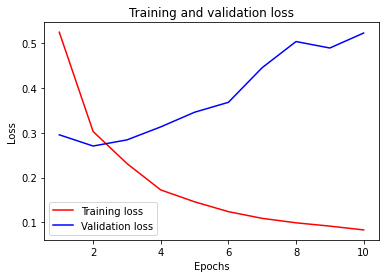

In [15]:
import matplotlib.pyplot as plt

# Graphing training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss', color='red')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/var/folders/vy/55zch8zs5qd1y2j8sysjjrk80000gn/T/ipykernel_88490/3317927507.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc_values, 'b', label='Accuracy', color='red')


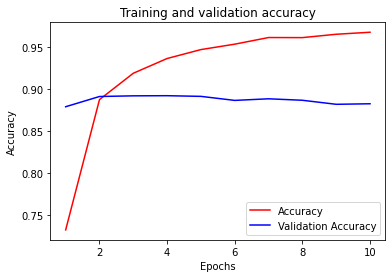

In [16]:
# Graphing training and validation accuracy.
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'b', label='Accuracy', color='red')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From these graphs, we can conclude that ideal epoch number for this model is 2.